In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

from numba import jit,prange

import time
import os

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [60]:
df = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/corr_matrices.csv',index_col=['Institution','Subject','Run'])
phenotypic = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/phenotypic.csv',index_col=['Institution','Subject'])

## Correlation matrix

In [61]:
def correlation_matrix(size, corr):
    corr_matrix = np.zeros((size,size))
    cont = 0

    for i in range(size):
        for j in range(i, size):
            if i == j:
                corr_matrix[i,j] = float('nan')


            else:
                corr_matrix[i,j] = corr[cont]
                corr_matrix[j,i] = corr[cont]
                cont += 1 
    return corr_matrix

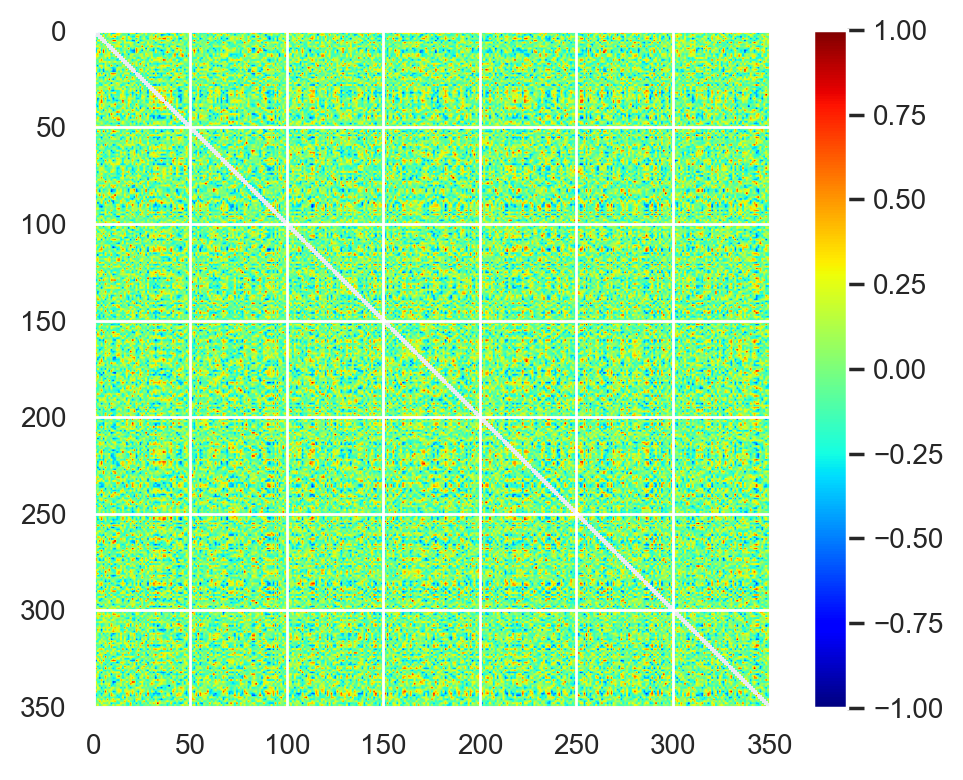

In [62]:
plt.figure(dpi=200)
im = plt.imshow(correlation_matrix(351,df.iloc[2].values), cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(-1,1)
plt.tight_layout()
#plt.savefig("connectivity_matrix_sample.png", dpi=200)

### Correlation distribution

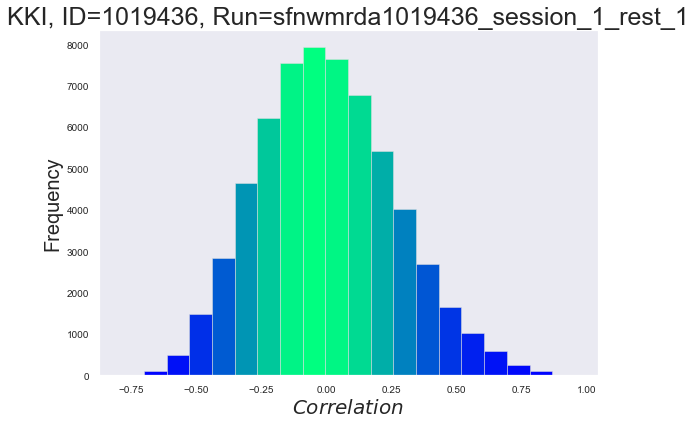

In [63]:
plt.figure(figsize=(8,6))
bins = 20
n, bins, patches = plt.hist((df.iloc[2,1:].values),bins=bins, facecolor='#2ab0ff',edgecolor='#e0e0e0',linewidth=0.5)

n = n.astype('int') # it MUST be integer

# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.winter(n[i]/max(n)))


plt.title("{}, ID={}, Run={}".format(df.iloc[2].name[0], df.iloc[2].name[1],df.iloc[2].name[2][:32]),fontsize=25)
plt.xlabel(r"$Correlation $")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid()
#plt.savefig("Sample_hist.png", dpi=200)

## Eda

In [64]:
phenotypic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 776 entries, ('WashU', 15001) to ('KKI', 9922944)
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site             776 non-null    int64  
 1   Gender           775 non-null    float64
 2   Age              776 non-null    float64
 3   Handedness       775 non-null    float64
 4   DX               776 non-null    int64  
 5   Secondary Dx     121 non-null    object 
 6   ADHD Measure     578 non-null    float64
 7   ADHD Index       499 non-null    float64
 8   Inattentive      578 non-null    float64
 9   Hyper/Impulsive  578 non-null    float64
 10  IQ Measure       728 non-null    float64
 11  Verbal IQ        588 non-null    float64
 12  Performance IQ   588 non-null    float64
 13  Full2 IQ         89 non-null     float64
 14  Full4 IQ         728 non-null    float64
 15  Med Status       578 non-null    float64
 16  Study #          61 non-null     f

#### Gender distribution

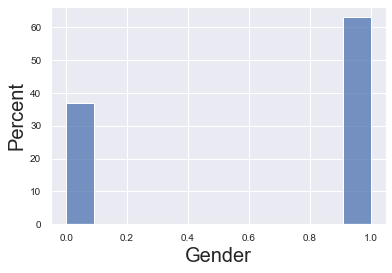

In [65]:
sns.histplot(data=phenotypic, x='Gender',stat='percent')

plt.show()

#### Age distribution

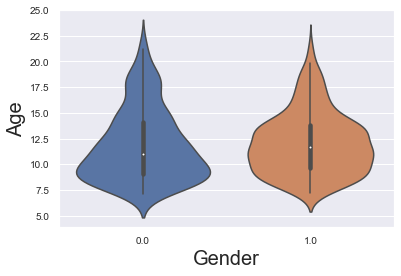

In [66]:
sns.violinplot(data=phenotypic, y='Age',x='Gender',stat='percent')
plt.show()

#### ADHD 

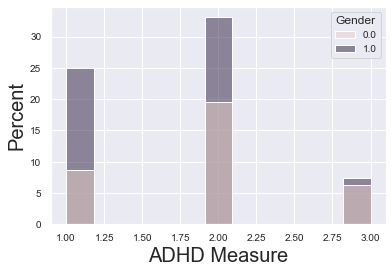

In [67]:
sns.histplot(data=phenotypic, x='ADHD Measure'  , stat='percent', hue='Gender')
plt.show()

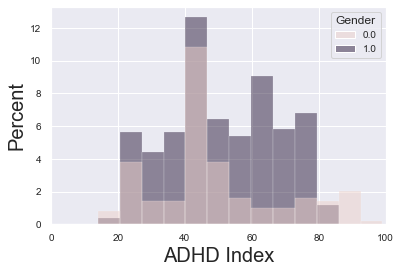

In [68]:
sns.histplot(data=phenotypic, x='ADHD Index'  , stat='percent', hue='Gender')

plt.xlim(0,100)
plt.show()

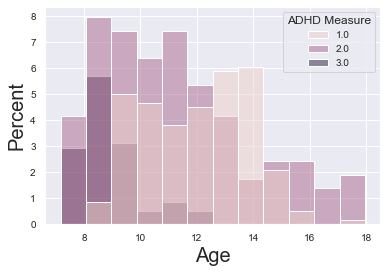

In [69]:
sns.histplot(data=phenotypic, x='Age'  , stat='percent', hue='ADHD Measure')
plt.show()

We must verify if the model is indeed identifying AGE or ADHD Measure

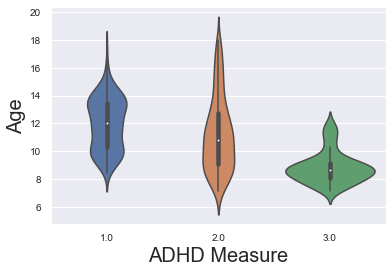

In [70]:
sns.violinplot(data=phenotypic, y='Age',x='ADHD Measure'  , stat='percent')
plt.show()

#### Quality check

In [71]:
phenotypic['QC_Rest_1'].value_counts()

 1.0      609
 0.0       89
-999.0     11
Name: QC_Rest_1, dtype: int64

In [72]:
phenotypic['QC_Anatomical_1'].value_counts()

 1.0      671
 0.0       32
-999.0     11
Name: QC_Anatomical_1, dtype: int64